## Titanic - Logistic Regression

Create a model that includes only age, fare, and pclass. Does this model perform better than your baseline?

Include sex in your model as well. Note that you'll need to encode or create a dummy variable of this feature before including it in a model.

## `Acquire`

In [1]:
import pandas as pd
import numpy as np

import acquire as acq
import prepare as prep
import stats_conclude as sc
import evaluate as ev

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

Load In successful, awaiting commands...
Load In successful, awaiting commands...


In [72]:
df = acq.get_titanic_data()

csv file found and loaded


In [73]:
df.isnull().sum()

passenger_id      0
survived          0
pclass            0
sex               0
age             177
sibsp             0
parch             0
fare              0
embarked          2
class             0
deck            688
embark_town       2
alone             0
dtype: int64

In [76]:
df.age.mode()

0    24.0
Name: age, dtype: float64

In [77]:
df['age'] = df[['age']].fillna(24)

In [78]:
df.isnull().sum()

passenger_id      0
survived          0
pclass            0
sex               0
age               0
sibsp             0
parch             0
fare              0
embarked          2
class             0
deck            688
embark_town       2
alone             0
dtype: int64

## `Prepare & Explore`

In [79]:
dft = prep.clean_titanic(df)

In [80]:
dft.head()

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,0,3,male,1,0,7.2500,Southampton,0,1,0,1
1,1,1,1,female,1,0,71.2833,Cherbourg,0,0,0,0
2,2,1,3,female,0,0,7.9250,Southampton,1,0,0,1
3,3,1,1,female,1,0,53.1000,Southampton,0,0,0,1
4,4,0,3,male,0,0,8.0500,Southampton,1,1,0,1


In [8]:
# drop off not needed columns
dft.drop(columns=['passenger_id', 'sibsp', 'parch', 'embark_town', 'sex',\
                  'embark_town_Southampton'], inplace=True)

In [9]:
# need to plug age back in
# dft['age'] = df['age']
dft

,survived,pclass,fare,alone,sex_male,embark_town_Queenstown
0,0,3,7.2500,0,1,0
1,1,1,71.2833,0,0,0
2,1,3,7.9250,1,0,0
3,1,1,53.1000,0,0,0
4,0,3,8.0500,1,1,0
...,...,...,...,...,...,...
886,0,2,13.0000,1,1,0
887,1,1,30.0000,1,0,0
888,0,3,23.4500,0,0,0
889,1,1,30.0000,1,1,0


In [10]:
# ready to split the target variable out!
dft

,survived,pclass,fare,alone,sex_male,embark_town_Queenstown
0,0,3,7.2500,0,1,0
1,1,1,71.2833,0,0,0
2,1,3,7.9250,1,0,0
3,1,1,53.1000,0,0,0
4,0,3,8.0500,1,1,0
...,...,...,...,...,...,...
886,0,2,13.0000,1,1,0
887,1,1,30.0000,1,0,0
888,0,3,23.4500,0,0,0
889,1,1,30.0000,1,1,0


In [11]:
# split the data
train, validate, test = prep.split_titanic(dft)
train.shape, validate.shape, test.shape

((534, 6), (178, 6), (179, 6))

In [12]:
# assign variables
target = 'survived'
X_train = train[['pclass',
                 'fare',
                 'sex_male']]
X_validate = validate[['pclass',
                 'fare',
                 'sex_male']]
X_test = test[['pclass',
                 'fare',
                 'sex_male']]
y_train = train[target]
y_validate = validate[target]
y_test = test[target]

In [13]:
X_train.head()

,pclass,fare,sex_male
455,3,7.8958,1
380,1,227.5250,0
492,1,30.5000,1
55,1,35.5000,1
243,3,7.1250,1


NULLS!

In [14]:
# make base model and send everything in

In [15]:
# target = 'survived'
# X_train = train
# X_validate = validate
# X_test = test
# y_train = train[target]
# y_validate = validate[target]
# y_test = test[target]

In [16]:
base_model = LogisticRegression()

In [17]:
base_model.fit(X_train, y_train)

LogisticRegression()

In [18]:
base_model.score(X_train, y_train)

0.7921348314606742

In [19]:
baseline_accuracy = (y_train == 0).mean()
baseline_accuracy

0.6161048689138576

In [20]:
baseline_accuracy

0.6161048689138576

In [21]:
base_model_c = LogisticRegression(C=.5)

In [22]:
base_model_c.fit(X_train, y_train)

LogisticRegression(C=0.5)

In [23]:
base_model_c.score(X_train, y_train)

0.7921348314606742

### Base model score 81%
### baseline is 62%
### Base model_c is 81%

## `Model`

In [24]:
# create the model
logit = LogisticRegression()
logit

LogisticRegression()

In [25]:
# fit the model
logit.fit(X_train, y_train)

LogisticRegression()

In [26]:
# use the model
model_1 = logit.score(X_train, y_train)
model_1

0.7921348314606742

In [27]:
# Change the C-value for model 1

In [28]:
logit1_c = LogisticRegression(C=0.5)

In [29]:
logit1_c.fit(X_train, y_train)

LogisticRegression(C=0.5)

In [30]:
model1_c_train = logit1_c.score(X_train, y_train)
model1_c_train

0.7921348314606742

In [32]:
model1_c_train, baseline_accuracy

(0.7921348314606742, 0.6161048689138576)

### Model 1 beat the baseline accuracy of 62% with 79% accuracy
### Model 1_c beat baseline with 78%

Try out other combinations of features and models.

In [33]:
train.head()

,survived,pclass,fare,alone,sex_male,embark_town_Queenstown
455,1,3,7.8958,1,1,0
380,1,1,227.5250,1,0,0
492,0,1,30.5000,1,1,0
55,1,1,35.5000,1,1,0
243,0,3,7.1250,1,1,0


In [34]:
# # use pclass, alone, embark_town_Queenstown
# # assign variables
# target = 'survived'
# X_train = train[['pclass', 'alone', 'sex_male', 'embark_town_Queenstown']]
# X_validate = validate[['pclass', 'alone', 'sex_male', 'embark_town_Queenstown']]
# X_test = test[['pclass', 'alone','sex_male',  'embark_town_Queenstown']]
# y_train = train[target]
# y_validate = validate[target]
# y_test = test[target]

In [35]:
logit2 = LogisticRegression()

In [36]:
logit2.fit(X_train, y_train)

LogisticRegression()

In [37]:
model2 = logit2.score(X_train, y_train)
model2

0.7921348314606742

In [38]:
baseline_accuracy

0.6161048689138576

In [39]:
model2, baseline_accuracy

(0.7921348314606742, 0.6161048689138576)

In [40]:
# Change the C-Value for model 2

In [41]:
logit2_c = LogisticRegression(C=0.5)
logit2_c

LogisticRegression(C=0.5)

In [42]:
logit2_c.fit(X_train, y_train)

LogisticRegression(C=0.5)

In [43]:
model2_c = logit2_c.score(X_train, y_train)
model2_c

0.7921348314606742

In [44]:
model2_c, baseline_accuracy

(0.7921348314606742, 0.6161048689138576)

In [45]:
logit2_c.fit(X_validate, y_validate)

LogisticRegression(C=0.5)

In [46]:
logit2_c.score(X_validate,y_validate)

0.7752808988764045

### Model 2 beat baseline with 70%
### Model 2_c beat baseline with 70%

Use you best 3 models to predict and evaluate on your validate sample.

In [47]:
base_model.fit(X_validate, y_validate)
base_model.score(X_validate, y_validate)

0.7752808988764045

In [48]:
base_model_c.fit(X_validate, y_validate)
base_model_c.score(X_validate, y_validate)

0.7752808988764045

In [49]:
logit1_c.fit(X_validate, y_validate)
model1_c_validate = logit1_c.score(X_validate, y_validate)
model1_c_validate

0.7752808988764045

### I got the same values for all three models: base, base with C, and model 1 with C = 80%
### baseline is 62%

Choose you best model from the validation performation, and evaluate it on the test dataset. How do the performance metrics compare to validate? to train?

In [50]:
logit1_c.fit(X_test, y_test)
model1_c_test = logit1_c.score(X_test, y_test)
model1_c_test

0.8044692737430168

In [51]:
model1_c_train.round(2), model1_c_validate.round(2), model1_c_test.round(2)

(0.79, 0.78, 0.8)

### Accuracy increased from train to validate to test on model_1_c!
    * Train Accuracy = 79%
    * Validate Accuracy = 78%
    * Test Accuracy = 80%
    
    * Baseline Accuracy = 62%

In [52]:
#classification report
print(classification_report(y_test, logit1_c.predict(X_test)))

              precision    recall  f1-score   support

           0       0.78      0.95      0.86       110
           1       0.89      0.57      0.69        69

    accuracy                           0.80       179
   macro avg       0.83      0.76      0.77       179
weighted avg       0.82      0.80      0.79       179



In [53]:
# view raw probabilities (output from the model)
logit1_c.predict_proba(X_test).round(2)[:5]

array([[0.88, 0.12],
       [0.14, 0.86],
       [0.88, 0.12],
       [0.11, 0.89],
       [0.52, 0.48]])

In [54]:
#coef
logit1_c.coef_

array([[-0.80389991,  0.00408527, -1.91540857]])

In [55]:
X_test.columns

Index(['pclass', 'fare', 'sex_male'], dtype='object')

## `Testing Area`

In [2]:
df = acq.get_titanic_data()

csv file found and loaded


In [3]:
dft = prep.clean_titanic(df)
dft

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,0,3,male,1,0,7.2500,Southampton,0,1,0,1
1,1,1,1,female,1,0,71.2833,Cherbourg,0,0,0,0
2,2,1,3,female,0,0,7.9250,Southampton,1,0,0,1
3,3,1,1,female,1,0,53.1000,Southampton,0,0,0,1
4,4,0,3,male,0,0,8.0500,Southampton,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,0,0,13.0000,Southampton,1,1,0,1
887,887,1,1,female,0,0,30.0000,Southampton,1,0,0,1
888,888,0,3,female,1,2,23.4500,Southampton,0,0,0,1
889,889,1,1,male,0,0,30.0000,Cherbourg,1,1,0,0


In [22]:
dft.drop(columns=['sex','embark_town'],inplace=True)

In [23]:
train, validate, test = prep.split_titanic(dft)
train.shape, validate.shape, test.shape

((534, 10), (178, 10), (179, 10))

## Model 1

In [24]:
# assign everything except passenger_id and the target variable
target = 'survived'
X_train = train.iloc[:,2:]
X_validate = validate.iloc[:,2:]
X_test = test.iloc[:,2:]
y_train = train[target]
y_validate = validate[target]
y_test = test[target]

In [25]:
X_train.head()

,pclass,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
455,3,0,0,7.8958,1,1,0,0
380,1,0,0,227.5250,1,0,0,0
492,1,0,0,30.5000,1,1,0,1
55,1,0,0,35.5000,1,1,0,1
243,3,0,0,7.1250,1,1,0,1


In [26]:
train.columns.tolist()

['passenger_id',
 'survived',
 'pclass',
 'sibsp',
 'parch',
 'fare',
 'alone',
 'sex_male',
 'embark_town_Queenstown',
 'embark_town_Southampton']

## Model 2

In [27]:
# assign select columns
target2 = 'survived'
X_train2 = train[['sibsp',
                 'parch',
                 'fare',
                 'embark_town_Queenstown',
                 'embark_town_Southampton']]
X_validate2 = validate[['sibsp',
                         'parch',
                         'fare',
                         'embark_town_Queenstown',
                         'embark_town_Southampton']]
X_test2 = test[['sibsp',
                 'parch',
                 'fare',
                 'embark_town_Queenstown',
                 'embark_town_Southampton']]
y_train2 = train[target2]
y_validate2 = validate[target2]
y_test2 = test[target2]

## Model 3

In [28]:
# assign select columns
target3 = 'survived'
X_train3 = train[['pclass',
                 'alone',
                 'sex_male']]
X_validate3 = validate[['pclass',
                 'alone',
                 'sex_male']]
X_test3 = test[['pclass',
                 'alone',
                 'sex_male']]
y_train3 = train[target3]
y_validate3 = validate[target3]
y_test3 = test[target3]

## Send in models

> ### Train

In [29]:
# base model = everything
ev.logit_evaluate(X_train, y_train)

The model's accuracy is 0.8
The baseline accuracy is 0.62.
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       329
           1       0.77      0.70      0.73       205

    accuracy                           0.80       534
   macro avg       0.79      0.78      0.79       534
weighted avg       0.80      0.80      0.80       534

The coefficents for features are: [[-0.9  -0.41 -0.12 -0.   -0.78 -2.57  0.48 -0.23]].
The corresponding columns are ['pclass', 'sibsp', 'parch', 'fare', 'alone', 'sex_male', 'embark_town_Queenstown', 'embark_town_Southampton'].


In [31]:
# model 2
ev.logit_evaluate(X_train2, y_train2)

The model's accuracy is 0.66
The baseline accuracy is 0.62.
              precision    recall  f1-score   support

           0       0.66      0.93      0.77       329
           1       0.67      0.24      0.35       205

    accuracy                           0.66       534
   macro avg       0.67      0.58      0.56       534
weighted avg       0.67      0.66      0.61       534

The coefficents for features are: [[-0.25  0.31  0.01  0.28 -0.44]].
The corresponding columns are ['sibsp', 'parch', 'fare', 'embark_town_Queenstown', 'embark_town_Southampton'].


In [32]:
# model 3
ev.logit_evaluate(X_train3, y_train3)

The model's accuracy is 0.79
The baseline accuracy is 0.62.
              precision    recall  f1-score   support

           0       0.81      0.86      0.84       329
           1       0.75      0.68      0.72       205

    accuracy                           0.79       534
   macro avg       0.78      0.77      0.78       534
weighted avg       0.79      0.79      0.79       534

The coefficents for features are: [[-0.95 -0.14 -2.58]].
The corresponding columns are ['pclass', 'alone', 'sex_male'].


> ### Validate

In [33]:
# base model validate
ev.logit_evaluate(X_validate, y_validate)

The model's accuracy is 0.81
The baseline accuracy is 0.62.
              precision    recall  f1-score   support

           0       0.83      0.86      0.85       110
           1       0.77      0.72      0.74        68

    accuracy                           0.81       178
   macro avg       0.80      0.79      0.80       178
weighted avg       0.81      0.81      0.81       178

The coefficents for features are: [[-0.36 -0.47 -0.36  0.01 -1.03 -2.1  -0.53 -0.4 ]].
The corresponding columns are ['pclass', 'sibsp', 'parch', 'fare', 'alone', 'sex_male', 'embark_town_Queenstown', 'embark_town_Southampton'].


In [34]:
# model 2 validate
ev.logit_evaluate(X_validate2, y_validate2)

The model's accuracy is 0.67
The baseline accuracy is 0.62.
              precision    recall  f1-score   support

           0       0.67      0.94      0.78       110
           1       0.71      0.25      0.37        68

    accuracy                           0.67       178
   macro avg       0.69      0.59      0.57       178
weighted avg       0.68      0.67      0.62       178

The coefficents for features are: [[-0.22 -0.04  0.02 -0.34 -0.28]].
The corresponding columns are ['sibsp', 'parch', 'fare', 'embark_town_Queenstown', 'embark_town_Southampton'].


In [35]:
# model 3 validate
ev.logit_evaluate(X_validate3, y_validate3)

The model's accuracy is 0.78
The baseline accuracy is 0.62.
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       110
           1       0.71      0.69      0.70        68

    accuracy                           0.78       178
   macro avg       0.76      0.76      0.76       178
weighted avg       0.77      0.78      0.77       178

The coefficents for features are: [[-0.7  -0.35 -1.99]].
The corresponding columns are ['pclass', 'alone', 'sex_male'].


> ### Test

In [36]:
# base model test
ev.logit_evaluate(X_test, y_test)

The model's accuracy is 0.81
The baseline accuracy is 0.61.
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       110
           1       0.79      0.70      0.74        69

    accuracy                           0.81       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.81      0.81      0.81       179

The coefficents for features are: [[-0.76 -0.32 -0.11  0.01 -0.15 -2.2  -0.5  -0.52]].
The corresponding columns are ['pclass', 'sibsp', 'parch', 'fare', 'alone', 'sex_male', 'embark_town_Queenstown', 'embark_town_Southampton'].


In [38]:
# model 2 test
ev.logit_evaluate(X_test2, y_test2)

The model's accuracy is 0.73
The baseline accuracy is 0.61.
              precision    recall  f1-score   support

           0       0.72      0.92      0.80       110
           1       0.76      0.42      0.54        69

    accuracy                           0.73       179
   macro avg       0.74      0.67      0.67       179
weighted avg       0.73      0.73      0.70       179

The coefficents for features are: [[-0.24  0.12  0.02 -0.62 -0.92]].
The corresponding columns are ['sibsp', 'parch', 'fare', 'embark_town_Queenstown', 'embark_town_Southampton'].


In [39]:
# model 3 test
ev.logit_evaluate(X_test3, y_test3)

The model's accuracy is 0.78
The baseline accuracy is 0.61.
              precision    recall  f1-score   support

           0       0.80      0.85      0.83       110
           1       0.74      0.67      0.70        69

    accuracy                           0.78       179
   macro avg       0.77      0.76      0.77       179
weighted avg       0.78      0.78      0.78       179

The coefficents for features are: [[-0.99  0.1  -2.26]].
The corresponding columns are ['pclass', 'alone', 'sex_male'].


## function used to evaluate clean titanic data

In [ ]:
# def logit_evaluate(x_df, y_s):
#     import pandas as pd
#     import numpy as np

#     import warnings
#     warnings.filterwarnings("ignore")

#     from sklearn.linear_model import LogisticRegression
#     from sklearn.metrics import classification_report
#     """
#     This function uses a plain Logistic Regression model with no 
#     hyperparameters set outside of default.
#     """
#     #create it
#     logit = LogisticRegression()

#     #fit it
#     logit.fit(x_df, y_s)

#     #use it
#     score = logit.score(x_df, y_s)
#     print(f"The model's accuracy is {round(score,2)}")
    
#     #establish series from array of coefficients to print
#     coef = logit.coef_
    
#     #baseline
#     baseline_accuracy = (y_s == 0).mean()
#     print(f"The baseline accuracy is {round(baseline_accuracy,2)}.")

#     #classification report
#     print(classification_report(y_s, logit.predict(x_df)))

#     #coef & corresponding columns
#     print(f"The coefficents for features are: {coef.round(2)}.\nThe corresponding columns are {x_df.columns.tolist()}.")

In [157]:
tr = tr.drop(columns=['embark_town'])

KeyError: "['embark_town'] not found in axis"

In [161]:
va = va.drop(columns=['embark_town'])
tt = tt.drop(columns=['embark_town'])

In [153]:
tr

,survived,pclass,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton,age
455,1,3,0,0,7.8958,1,1,0,0,29.0
380,1,1,0,0,227.5250,1,0,0,0,42.0
492,0,1,0,0,30.5000,1,1,0,1,55.0
55,1,1,0,0,35.5000,1,1,0,1,24.0
243,0,3,0,0,7.1250,1,1,0,1,22.0
...,...,...,...,...,...,...,...,...,...,...
695,0,2,0,0,13.5000,1,1,0,1,52.0
128,1,3,1,1,22.3583,0,0,0,0,24.0
636,0,3,0,0,7.9250,1,1,0,1,32.0
222,0,3,0,0,8.0500,1,1,0,1,51.0


In [162]:
va

,survived,pclass,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton,age
176,0,3,3,1,25.4667,0,1,0,1,24.0
372,0,3,0,0,8.0500,1,1,0,1,19.0
678,0,3,1,6,46.9000,0,0,0,1,43.0
778,0,3,0,0,7.7375,1,1,1,0,24.0
463,0,2,0,0,13.0000,1,1,0,1,48.0
...,...,...,...,...,...,...,...,...,...,...
622,1,3,1,1,15.7417,0,1,0,0,20.0
302,0,3,0,0,0.0000,1,1,0,1,19.0
518,1,2,1,0,26.0000,0,0,0,1,36.0
765,1,1,1,0,77.9583,0,0,0,1,51.0


In [163]:
# assign sets
target = 'survived'
X_tr = tr.iloc[:,1:]
X_va = va.iloc[:,1:]
X_tt = tt.iloc[:,1:]
y_tr = tr[target]
y_va = va[target]
y_tt = tt[target]

In [159]:
def all_4_classifiers(X_tr, y_tr, X_va, y_va):
    """
    This function takes in data and models for decision tree, 
    random forest, knn, and logistic regression.
    """
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.metrics import classification_report
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.linear_model import LogisticRegression
    import warnings
    warnings.filterwarnings("ignore")
    
    
    # DECISION TREE
    print(f"DECISION TREE")
    scores_all=[]
    
    for i in range(1,11):
        tree = DecisionTreeClassifier(max_depth=i, random_state=123)
        tree.fit(X_tr, y_tr)
        train_acc = tree.score(X_tr, y_tr)
        print(f"For depth of {i:2}, the accuracy is {round(train_acc,2)}")
        
        # evaludate on validate set
        validate_acc = tree.score(X_va, y_va)

        # append to df scores_all
        scores_all.append([i, train_acc, validate_acc])

        # turn to df
        scores_df = pd.DataFrame(scores_all, columns=['max_depth', 'train_acc', 'validate_acc'])

        # make new column
        scores_df['difference'] = scores_df.train_acc - scores_df.validate_acc

        # sort on difference
        scores_df.sort_values('difference')
        
        # establish baseline accuracy
    baseline_accuracy = (y_tr == 0).mean()
    print()
    print(f'The baseline accuracy is {round(baseline_accuracy,2)}')
          
        # can plot to visulaize
    plt.figure(figsize=(12,8))
    plt.plot(scores_df.max_depth, scores_df.train_acc, label='train', marker='o')
    plt.plot(scores_df.max_depth, scores_df.validate_acc, label='validate', marker='o')
    plt.axhline(baseline_accuracy, linewidth=2, color='black', label='baseline')
    plt.xlabel('Max Depth for Decision Tree')
    plt.ylabel('Accuracy')
    plt.xticks(np.arange(1,11, step=1))
    plt.title('Where do I begin to overfit?')
    plt.legend()
    plt.show()
    
    # RANDOM FOREST
    print(f"RANDOM FOREST")
    scores_rf=[]

    for i in range(1,11):
        rf = RandomForestClassifier(random_state = 123,max_depth = i)
        rf.fit(X_tr, y_tr)
        train_acc_rf = rf.score(X_tr, y_tr)
        print(f"For depth of {i:2}, the accuracy is {round(train_acc_rf,2)}")
        
        # establish feature importance variable
        important_features = rf.feature_importances_
        
        # evaluate on validate set
        validate_acc_rf = rf.score(X_va, y_va)

        # append to rf scores_all
        scores_rf.append([i, train_acc_rf, validate_acc_rf])

        # turn to df
        scores_df2 = pd.DataFrame(scores_rf, columns=['max_depth', 'train_acc_rf', 'validate_acc_rf'])

        # make new column
        scores_df2['difference'] = scores_df2.train_acc_rf - scores_df2.validate_acc_rf

        # sort on difference
        scores_df2.sort_values('difference')

        # print baseline
    print(f'The baseline accuracy is {round(baseline_accuracy,2)}')
          
        # plot to visulaize train and validate accuracies for best fit
    plt.figure(figsize=(12,8))
    plt.plot(scores_df2.max_depth, scores_df2.train_acc_rf, label='train', marker='o')
    plt.plot(scores_df2.max_depth, scores_df2.validate_acc_rf, label='validate', marker='o')
    plt.axhline(baseline_accuracy, linewidth=2, color='black', label='baseline')
    plt.xlabel('Max Depth for Random Forest')
    plt.ylabel('Accuracy')
    plt.xticks(np.arange(1,11, step=1))
    plt.title('Where do I begin to overfit?')
    plt.legend()
    plt.show()
    
        # plot feature importance
    plt.figure(figsize=(12,12))
    plt.bar(X_tr.columns, important_features)
    plt.title(f"Feature Importance")
    plt.xlabel(f"Features")
    plt.ylabel(f"Importance")
    plt.xticks(rotation = 60)
    plt.show()
    
    # KNN
    print(f"KNN")
    print(f"The number of features sent in : {len(X_tr.columns)} and are {X_tr.columns.tolist()}.")

    # run for loop and plot
    metrics = []
    for k in range(1,21):
        
        # make the model
        knn = KNeighborsClassifier(n_neighbors=k)
        
        # fit the model
        knn.fit(X_tr, y_tr)
        
        # calculate accuracy
        train_score = knn.score(X_tr, y_tr)
        validate_score = knn.score(X_va, y_va)
        
        # append to df metrics
        metrics.append([k, train_score, validate_score])

        # turn to df
        metrics_df = pd.DataFrame(metrics, columns=['k', 'train score', 'validate score'])
      
        # make new column
        metrics_df['difference'] = metrics_df['train score'] - metrics_df['validate score']
    min_diff_idx = np.abs(metrics_df['difference']).argmin()
    n = metrics_df.loc[min_diff_idx, 'k']
    print(f"{n} is the number of neighbors that produces the best fit model.")
    print(f"The accuracy score for the train model is {round(train_score,2)}.")
    print(f"The accuracy score for the validate model is {round(validate_score,2)}.")
    
    
    # plot the data
    metrics_df.set_index('k').plot(figsize = (14,12))
    plt.axvline(x=n, color='black', linestyle='--', linewidth=1, label='best fit neighbor size')
    plt.axhline(y=train_score, color='blue', linestyle='--', linewidth=1, label='train accuracy')
    plt.axhline(y=validate_score, color='orange', linestyle='--', linewidth=1, label='validate accuracy')
    plt.ylabel('Accuracy')
    plt.xticks(np.arange(0,21,1))
    plt.legend()
    plt.grid()
    plt.show()
    
    
    # LOGISTIC REGRESSION
    print(f"LOGISTIC REGRESSION")
    #create it
    logit = LogisticRegression()

    #fit it
    logit.fit(X_tr, y_tr)

    #use it
    lt_score = logit.score(X_tr, y_tr)
    print(f"The model's accuracy is {round(lt_score,2)}")
    
    #establish series from array of coefficients to print
    coef = logit.coef_
    
    #baseline
    print(f"The baseline accuracy is {round(baseline_accuracy,2)}.")

    #classification report
    print(classification_report(y_tr, logit.predict(X_tr)))

DECISION TREE
For depth of  1, the accuracy is 0.79
For depth of  2, the accuracy is 0.79
For depth of  3, the accuracy is 0.83
For depth of  4, the accuracy is 0.83
For depth of  5, the accuracy is 0.85
For depth of  6, the accuracy is 0.86
For depth of  7, the accuracy is 0.87
For depth of  8, the accuracy is 0.9
For depth of  9, the accuracy is 0.91
For depth of 10, the accuracy is 0.93

The baseline accuracy is 0.62


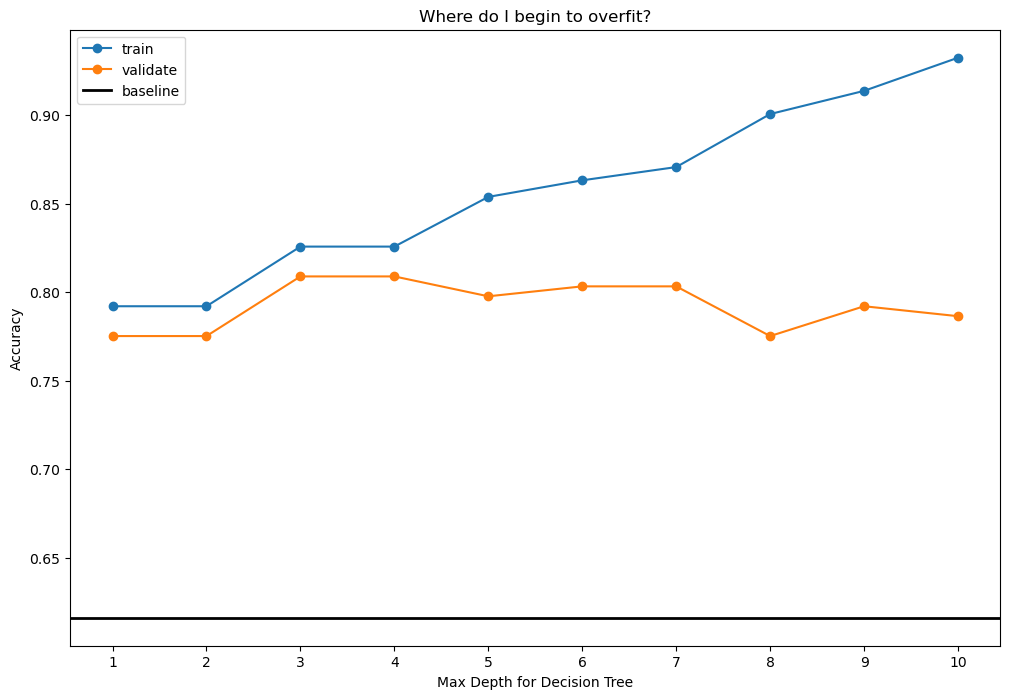

RANDOM FOREST
For depth of  1, the accuracy is 0.78
For depth of  2, the accuracy is 0.81
For depth of  3, the accuracy is 0.83
For depth of  4, the accuracy is 0.86
For depth of  5, the accuracy is 0.87
For depth of  6, the accuracy is 0.9
For depth of  7, the accuracy is 0.93
For depth of  8, the accuracy is 0.94
For depth of  9, the accuracy is 0.95
For depth of 10, the accuracy is 0.97
The baseline accuracy is 0.62


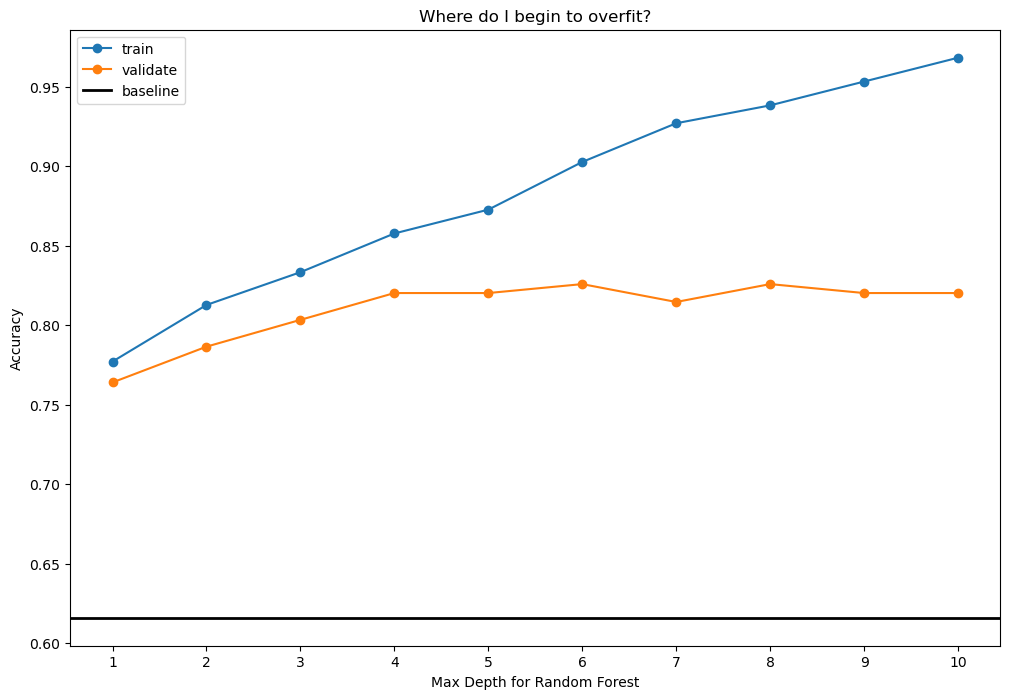

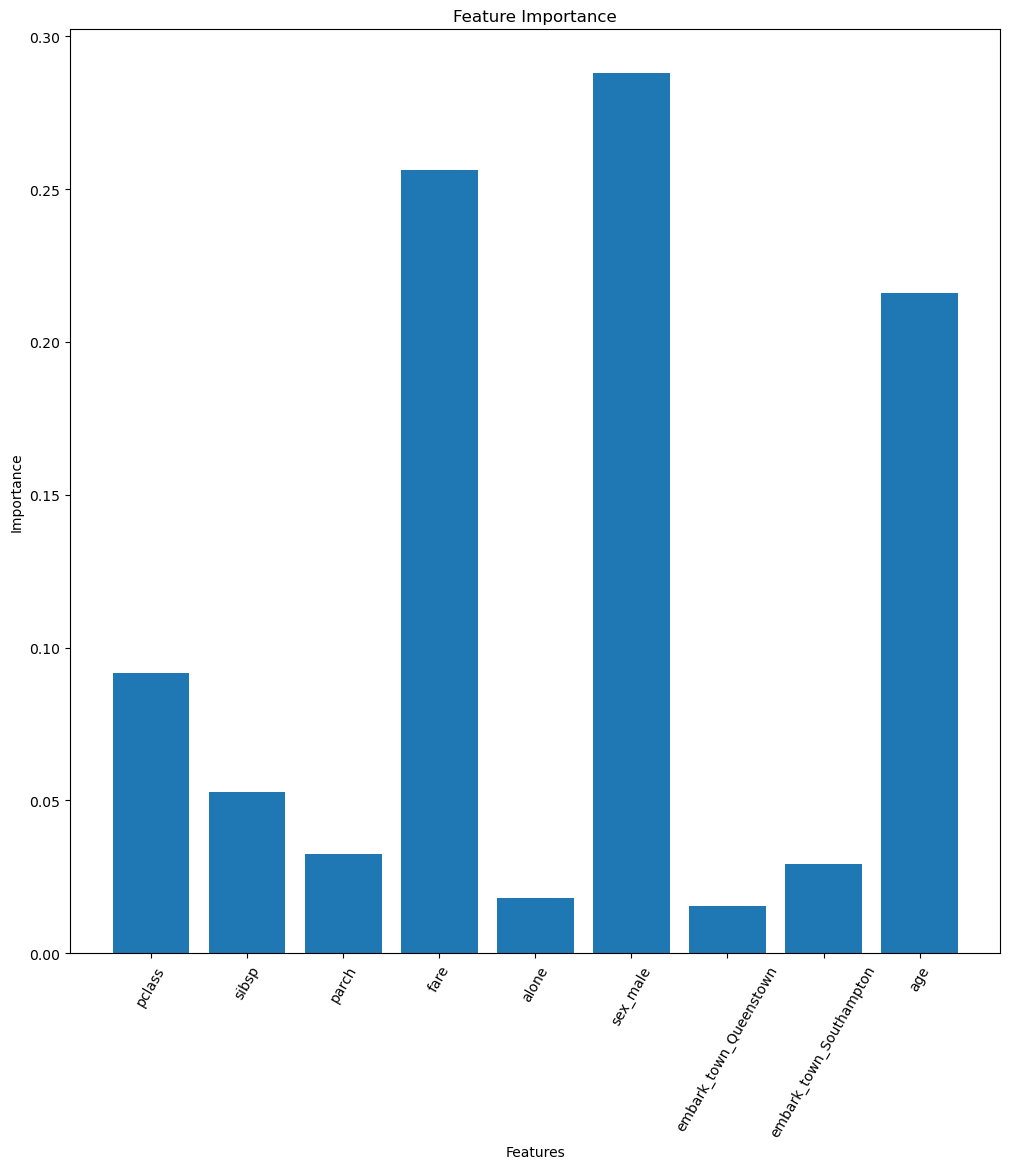

KNN
The number of features sent in : 9 and are ['pclass', 'sibsp', 'parch', 'fare', 'alone', 'sex_male', 'embark_town_Queenstown', 'embark_town_Southampton', 'age'].
13 is the number of neighbors that produces the best fit model.
The accuracy score for the train model is 0.72.
The accuracy score for the validate model is 0.75.


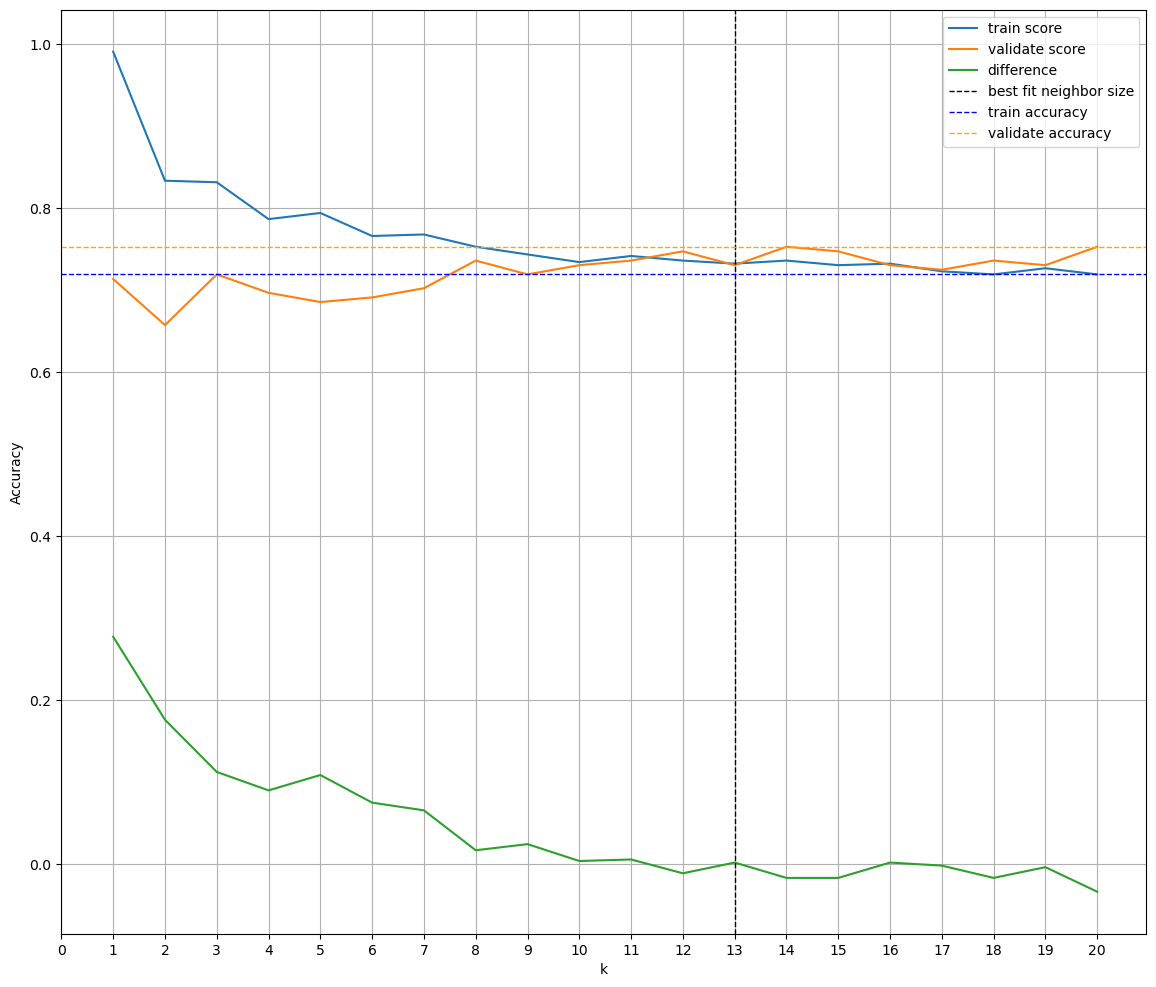

LOGISTIC REGRESSION
The model's accuracy is 0.79
The baseline accuracy is 0.62.
              precision    recall  f1-score   support

           0       0.82      0.85      0.84       329
           1       0.74      0.71      0.72       205

    accuracy                           0.79       534
   macro avg       0.78      0.78      0.78       534
weighted avg       0.79      0.79      0.79       534



In [164]:
all_4_classifiers(X_tr, y_tr, X_va, y_va)